In [1]:
import mib_v2_1_1 as mb
import mib as mb1
import pandas as pd
import time
from itertools import product
import tracemalloc
import matplotlib.pyplot as plt

# Test 1

## Planteamiento
Comparar rendimiento del mib1.0 contra el mib2.0 con problema pequeño y con tres eventon con distribuciones uniformes.
Se hara el test 100 veces y en cada iteración la cardinalidad de las tres variables crecera en 1, iniciando por cardinalidad de uno.

### Variables
A = \{0, 2, ..., n-1\}

B = \{0, 2, ..., n-1\}

C = \{0, 2, ..., n-1\}

### Modelo de descomposición
$P(ABC) = P(A)P(B|A)P(C|AB)$.

$\;\;\;\;\;\;\;\;\;\;\;\;$<img src="./P(ABC).jpg" width=200/>

### Formas
$P(A)$, $P(B|A)$ y $P(C|AB)$ serán distribuciones uniformes.

## MIB1.0

In [ ]:
n = 30
timesM1 = []
memoryM1 = []

timesC1 = []
memoryC1 = []

for i in range(n):
    Events = [x for x in range(i+1)]
    # Varaibles
    A = mb1.Var('A',Events)
    B = mb1.Var('B',Events)
    C = mb1.Var('C',Events)

    dA = {}
    dB_A = {}
    dC_AB = []
    value = 1 / (i+1)
    for e in Events:
        dA[e] = value
        dB_A[e] = {}
        for e1 in Events:
            dB_A[e][e1] = value
            tC_AB = []
            for e2 in Events:
                tC_AB.append(value)
            dC_AB.append(tuple(tC_AB))
    
    PA=mb1.Distrib(name='P(A)',variable=[A],tabla=dA)
    PB_A=mb1.DistribCond(name='P(B|A)',var=B,indep=[A],tabla=dB_A)
    PC_AB=mb1.DistribCond('P(C|AB)',C,[A,B],dC_AB)
    
    PABC=mb1.JointDistrib(name='P(ABC)',variables=[A,B,C],descomp=[PA,PB_A,PC_AB])
    Q_ABC=mb1.Question(joint=PABC)

    #Inferencia de P(B)
    tracemalloc.start()
    
    inicio = time.time()
    PB = Q_ABC.query(searched=[B])
    fin = time.time()
    
    memoria_actual, memoria_pico = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tiempo_ejecucion = fin - inicio
    
    timesM1.append(tiempo_ejecucion)
    memoryM1.append(memoria_pico)
    
    #Inferencia de P(A|BC)
    tracemalloc.start()
    
    inicio = time.time()
    PA_BC = Q_ABC.query(searched=[A], known=[B,C])
    fin = time.time() 
    
    memoria_actual, memoria_pico = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tiempo_ejecucion = fin - inicio
    
    timesC1.append(tiempo_ejecucion)
    memoryC1.append(memoria_pico)

## MIB2.1.1

In [2]:
n = 10
timesM = []
memoryM = []
timesC = []
memoryC = []
times = []


for i in range(n):
    Events = set([x for x in range(i+1)])
    
    # Creación de varaibles
    A = mb.Var(name='A', values=Events)
    B = mb.Var(name='C', values=Events)
    C = mb.Var(name='B', values=Events)
    
    # Generación de distribuciones de probabilidad (Distribuciones uniformes).
    
    tA = []
    tB_A = []
    tC_AB = []
    p = 1 / (i+1)
    
    for a in A.values:
        tA.append([a,p])
        
        for b in B.values:
            tB_A.append([a,b,p])
            
            for c in C.values:
                tC_AB.append([a,b,c,p])
            
    
    # Creación de distriuciones
    dA = pd.DataFrame(tA, columns=[A.name,'probability'])
    PA = mb.Distrib(set([A]), dA)
    
    dB_A = pd.DataFrame(tB_A, columns=[A.name, B.name,'probability'])
    PB_A = mb.CondDistrib(set([B]), set([A]),dB_A)
    
    dC_AB = pd.DataFrame(tC_AB, columns=[A.name, B.name, C.name,'probability'])
    PC_AB = mb.CondDistrib(set([C]), set([A,B]),dC_AB)
    
    # Espesificación 
    PABC = mb.Specification(vars=set([A,B,C]), descomp=set([PA,PB_A, PC_AB]))
    
    # Creación de pregunta
    Q_ABC = mb.Question(PABC)
    
    # Infererir la distribución P(B)
    tracemalloc.start()
    
    inicio = time.time()
    PB = Q_ABC.DistributionQuery(vars=set([B]))
    times.append(Q_ABC.mib.times)
    fin = time.time()
    
    memoria_actual, memoria_pico = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tiempo_ejecucion = fin - inicio
    
    timesM.append(tiempo_ejecucion)
    memoryM.append(memoria_pico)
    print(i+1)
    

1
2
3
4
5
6
7
8
9
10


In [5]:
n = 20
timesM = []
memoryM = []
timesC = []
memoryC = []
times = []   
Events = set([x for x in range(n)])
    
# Creación de varaibles
A = mb.Var(name='A', values=Events)
B = mb.Var(name='C', values=Events)
C = mb.Var(name='B', values=Events)
    
# Generación de distribuciones de probabilidad (Distribuciones uniformes).
    
tA = []
tB_A = []
tC_AB = []
p = 1 / (n)
    
for a in A.values:
    tA.append([a,p])
        
    for b in B.values:
        tB_A.append([a,b,p])
            
        for c in C.values:
            tC_AB.append([a,b,c,p])
            
    
# Creación de distriuciones
dA = pd.DataFrame(tA, columns=[A.name,'probability'])
PA = mb.Distrib(set([A]), dA)
    
dB_A = pd.DataFrame(tB_A, columns=[A.name, B.name,'probability'])
PB_A = mb.CondDistrib(set([B]), set([A]),dB_A)
    
dC_AB = pd.DataFrame(tC_AB, columns=[A.name, B.name, C.name,'probability'])
PC_AB = mb.CondDistrib(set([C]), set([A,B]),dC_AB)
    
# Espesificación 
PABC = mb.Specification(vars=set([A,B,C]), descomp=set([PA,PB_A, PC_AB]))
    
# Creación de pregunta
Q_ABC = mb.Question(PABC)
# Infererir la distribución P(B)
tracemalloc.start()
    
inicio = time.time()
PB = Q_ABC.Query(vars=set([B]))
times.append(Q_ABC.mib.times)
fin = time.time()
    
memoria_actual, memoria_pico = tracemalloc.get_traced_memory()
tracemalloc.stop()
    
tiempo_ejecucion = fin - inicio
    
timesM.append(tiempo_ejecucion)
memoryM.append(memoria_pico)

In [9]:
timesM[0]

12.04339337348938

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

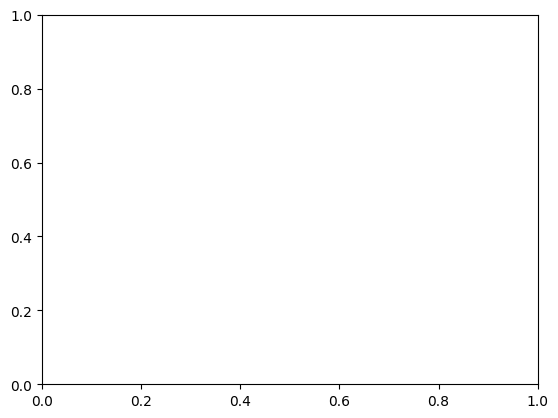

In [8]:
xn = [i+1 for i in range(n)]
fig, ax = plt.subplots()

# MIB_2.0
ax.plot(xn, timesM, color='r',label = 'MIB_2.0')
ax.set_title("Tiempo de la inferencia en P(B) (MIB2.0)")

ax.set_xlabel("n")
ax.set_ylabel("segundos")
ax.legend(loc = 'upper left')

# Mostrar las gráficas
plt.show()

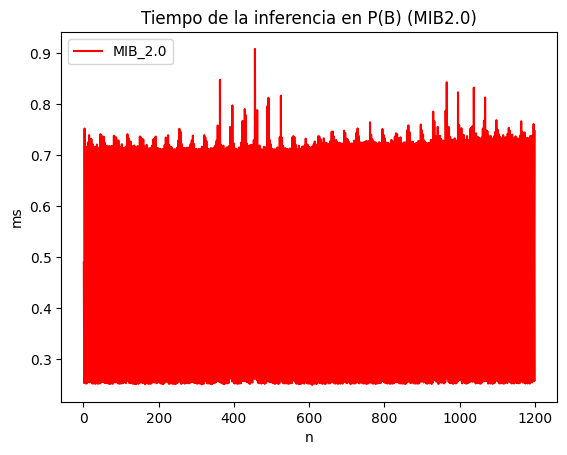

In [6]:
ni = 0
xn = [i+1 for i in range(len(times[ni]))]
fig, ax = plt.subplots()

timems = [(t * 1000) for t in times[ni]]
# MIB_2.0
ax.plot(xn, timems, color='r',label = 'MIB_2.0')
ax.set_title("Tiempo de la inferencia en P(B) (MIB2.0)")

ax.set_xlabel("n")
ax.set_ylabel("ms")
ax.legend(loc = 'upper left')

# Mostrar las gráficas
plt.show()

In [8]:
pro = 0
for t in timems:
    pro+=1
print(pro / len(timems))

1.0


In [4]:
n = 19
timesM = []
memoryM = []
timesC = []
memoryC = []


for i in range(n):
    Events = set([x for x in range(i+1)])
    
    # Creación de varaibles
    A = mb.Var(name='A', values=Events)
    B = mb.Var(name='C', values=Events)
    C = mb.Var(name='B', values=Events)
    
    # Generación de distribuciones de probabilidad (Distribuciones uniformes).
    
    tA = []
    tB_A = []
    tC_AB = []
    p = 1 / (i+1)
    
    for a in A.values:
        tA.append([a,p])
        
        for b in B.values:
            tB_A.append([a,b,p])
            
            for c in C.values:
                tC_AB.append([a,b,c,p])
            
    
    # Creación de distriuciones
    dA = pd.DataFrame(tA, columns=[A.name,'probability'])
    PA = mb.Distrib(set([A]), dA)
    
    dB_A = pd.DataFrame(tB_A, columns=[A.name, B.name,'probability'])
    PB_A = mb.CondDistrib(set([B]), set([A]),dB_A)
    
    dC_AB = pd.DataFrame(tC_AB, columns=[A.name, B.name, C.name,'probability'])
    PC_AB = mb.CondDistrib(set([C]), set([A,B]),dC_AB)
    
    # Espesificación 
    PABC = mb.Specification(vars=set([A,B,C]), descomp=set([PA,PB_A, PC_AB]))
    
    # Creación de pregunta
    Q_ABC = mb.Question(PABC)
    
    # Infererir la distribución P(B)
    tracemalloc.start()
    
    inicio = time.time()
    print(i+1)
    PB = Q_ABC.DistributionQuery(vars=set([A]), indep=set([B,C]))
    fin = time.time()
    
    memoria_actual, memoria_pico = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tiempo_ejecucion = fin - inicio
    
    timesM.append(tiempo_ejecucion)
    memoryM.append(memoria_pico)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14


KeyboardInterrupt: 

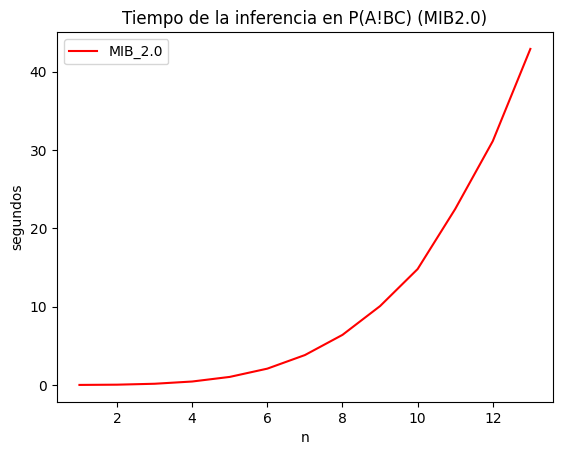

In [5]:
xn = [i+1 for i in range(13)]
fig, ax = plt.subplots()

# MIB_2.0
ax.plot(xn, timesM, color='r',label = 'MIB_2.0')
ax.set_title("Tiempo de la inferencia en P(A|BC) (MIB2.0)")

ax.set_xlabel("n")
ax.set_ylabel("segundos")
ax.legend(loc = 'upper left')

# Mostrar las gráficas
plt.show()

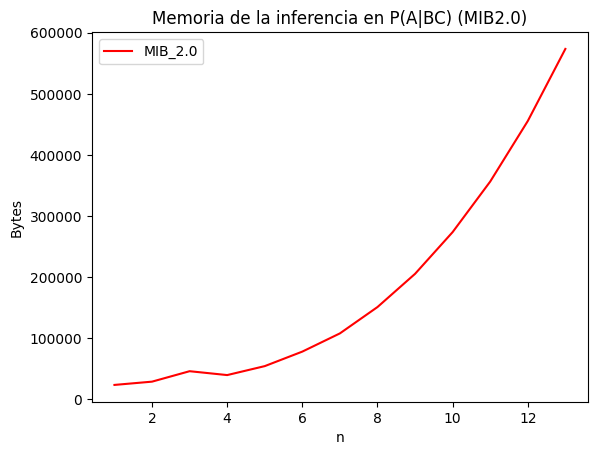

In [7]:
xn = [i+1 for i in range(13)]
fig, ax = plt.subplots()

# MIB_2.0
ax.plot(xn, memoryM, color='r',label = 'MIB_2.0')
ax.set_title("Memoria de la inferencia en P(A|BC) (MIB2.0)")

ax.set_xlabel("n")
ax.set_ylabel("Bytes")
ax.legend(loc = 'upper left')

# Mostrar las gráficas
plt.show()